In [1]:
import numpy as np

In [2]:
X = np.linspace(1,20,50)

In [3]:
X

array([ 1.        ,  1.3877551 ,  1.7755102 ,  2.16326531,  2.55102041,
        2.93877551,  3.32653061,  3.71428571,  4.10204082,  4.48979592,
        4.87755102,  5.26530612,  5.65306122,  6.04081633,  6.42857143,
        6.81632653,  7.20408163,  7.59183673,  7.97959184,  8.36734694,
        8.75510204,  9.14285714,  9.53061224,  9.91836735, 10.30612245,
       10.69387755, 11.08163265, 11.46938776, 11.85714286, 12.24489796,
       12.63265306, 13.02040816, 13.40816327, 13.79591837, 14.18367347,
       14.57142857, 14.95918367, 15.34693878, 15.73469388, 16.12244898,
       16.51020408, 16.89795918, 17.28571429, 17.67346939, 18.06122449,
       18.44897959, 18.83673469, 19.2244898 , 19.6122449 , 20.        ])

In [4]:
y = 3*X - 2 + 10*np.random.random(size=len(X))

In [5]:
y

array([ 6.90976758, 11.31402033,  5.11319631, 11.79640074,  8.93079623,
       13.71261463, 14.88218655, 11.40974667, 18.8668603 , 13.55535552,
       17.95670187, 16.910785  , 15.18817644, 19.51235744, 25.54517009,
       19.48265509, 28.45937141, 30.37574574, 24.92276193, 25.3877231 ,
       29.09370077, 29.80772773, 35.67111297, 33.08592461, 37.75710553,
       38.62432818, 39.42949551, 35.06683092, 40.30520669, 36.43894871,
       39.95130626, 39.52133568, 48.13389796, 47.08878105, 42.14430748,
       46.45286861, 44.3927413 , 52.05835305, 48.04065188, 47.30239637,
       50.14499878, 53.7226743 , 51.36004889, 57.28227498, 60.32066383,
       61.50920677, 57.40065155, 56.02744346, 64.58350596, 63.65869689])

In [6]:
import matplotlib.pyplot as plt

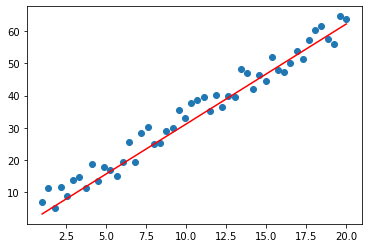

In [7]:
plt.scatter(X,y)
plt.plot(X, 3.1*X+0.2, color='red');

In [8]:
np.corrcoef(X,y)

array([[1.        , 0.98528285],
       [0.98528285, 1.        ]])

**Goal:**  Build a model between $X$ and $y$, one that "best fits" the data.  I want a mathematical function of this form: 

$$ y = m\cdot X + b$$

for some (yet to be determined) numbers $m$ and $b$.  

This is an example of [simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression).  

**Idea:** What do we mean by the line that "best fits" the data?  The usual definition is to find the values of $m$ and $b$ that *minimize* the average squared error.  In other words, for each point $x_i$, I want to find a point $y_{i,pred} = m\cdot x_i +b$ that minimizes the following:

$$\frac{1}{n}\sum_i (y_i - y_{i,pred})^2 = \frac{1}{n}\sum_i(y_i - (m\cdot x_i + b))^2 $$

This is the "average of the squared error" between the real data points and the estimated (predicted) values from my model above.  

$n$ is the number of data points in my data set. 

Solving this problem is a calculus problem (but that mathematics *isn't* given here.)  

In [9]:
def linear_regression(x, y):
    """Simple linear regression (i.e. a single independent variable).
    
    Finds coefficients m and b to fit a line y = m*x + b to the input data.
    Assumes the input is in the form of numpy arrays.
    """
    m = ((x - x.mean())*(y-y.mean())).sum()/((x-x.mean())**2).sum()
    b = y.mean() - m*x.mean()
    
    return (m, b)

In [10]:
coeff = linear_regression(X,y)

In [11]:
coeff  # (m, b)

(2.960518607387863, 3.446746214756921)

In [12]:
def predict(x, coeff):
    return x*coeff[0] + coeff[1]

In [13]:
predict(X, coeff)

array([ 6.40726482,  7.55522102,  8.70317721,  9.85113341, 10.9990896 ,
       12.1470458 , 13.29500199, 14.44295819, 15.59091438, 16.73887057,
       17.88682677, 19.03478296, 20.18273916, 21.33069535, 22.47865155,
       23.62660774, 24.77456394, 25.92252013, 27.07047633, 28.21843252,
       29.36638872, 30.51434491, 31.66230111, 32.8102573 , 33.95821349,
       35.10616969, 36.25412588, 37.40208208, 38.55003827, 39.69799447,
       40.84595066, 41.99390686, 43.14186305, 44.28981925, 45.43777544,
       46.58573164, 47.73368783, 48.88164403, 50.02960022, 51.17755642,
       52.32551261, 53.4734688 , 54.621425  , 55.76938119, 56.91733739,
       58.06529358, 59.21324978, 60.36120597, 61.50916217, 62.65711836])

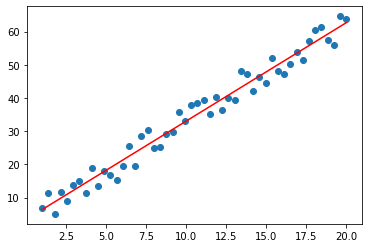

In [14]:
plt.scatter(X,y)
plt.plot(X,predict(X,coeff), color='red');

### Scikit-learn

A Python package for doing machine learning. Includes a Python class that performs (simple) linear regression, among a large number of other tools for doing supervised and unsupervised machine learning.  

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

lr.fit(X.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.coef_

array([2.96051861])

In [18]:
lr.intercept_

3.44674621475691

In [19]:
lr.predict(X.reshape(-1,1))

array([ 6.40726482,  7.55522102,  8.70317721,  9.85113341, 10.9990896 ,
       12.1470458 , 13.29500199, 14.44295819, 15.59091438, 16.73887057,
       17.88682677, 19.03478296, 20.18273916, 21.33069535, 22.47865155,
       23.62660774, 24.77456394, 25.92252013, 27.07047633, 28.21843252,
       29.36638872, 30.51434491, 31.66230111, 32.8102573 , 33.95821349,
       35.10616969, 36.25412588, 37.40208208, 38.55003827, 39.69799447,
       40.84595066, 41.99390686, 43.14186305, 44.28981925, 45.43777544,
       46.58573164, 47.73368783, 48.88164403, 50.02960022, 51.17755642,
       52.32551261, 53.4734688 , 54.621425  , 55.76938119, 56.91733739,
       58.06529358, 59.21324978, 60.36120597, 61.50916217, 62.65711836])